In [264]:
# calibration with data collected during 2002-2003 in marrakech / Field C2

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C2")
import pcse
cropfile = os.path.join(data_dir, 'C2.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=15, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'C2_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS,TSUM,TSUM1
day,,,,,,,,,,,,,,,
2003-05-25,1.901964,0.282524,5008.952051,1910.759529,1055.511077,2042.681444,525.871301,0.003851,55.0,0.174235,23.982928,0.0,0.051329,1349.566,None
2003-05-26,1.923126,0.175122,5008.952051,1910.759529,1055.511077,2042.681444,525.871301,0.001986,55.0,0.173232,23.927748,0.0,0.058295,1364.676,None
2003-05-27,1.947587,0.132591,5008.952051,1910.759529,1055.511077,2042.681444,525.871301,0.001018,55.0,0.172136,23.867467,0.0,0.057925,1382.141,None
2003-05-28,1.978651,0.091097,5008.952051,1910.759529,1055.511077,2042.681444,525.871301,0.000373,55.0,0.171064,23.808524,0.0,0.066646,1404.321,None
2003-05-29,2.000000,0.030675,5008.952051,1910.759529,1055.511077,2042.681444,525.871301,0.000000,55.0,0.169846,23.741505,0.0,0.046106,1428.641,None


In [265]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C2s.xls")

sortie_C2 = pd.read_excel('/Users/mac/LAI_TAGP_TWSO_2002_2003.xlsx' , sheet_name="C2") 
result = sortie_C2.set_index("day")
# result

In [266]:
wofsim.get_summary_output()

[{'DVS': 2.0,
  'LAIMAX': 3.6010034072481756,
  'TAGP': 5008.9520509100275,
  'TWSO': 1910.759529149241,
  'TWLV': 1055.5110773228555,
  'TWST': 2042.6814444379315,
  'TWRT': 525.8713006091259,
  'CTRAT': 20.788978258333984,
  'RD': 55.0,
  'DOS': datetime.date(2003, 1, 11),
  'DOE': datetime.date(2003, 1, 25),
  'DOA': datetime.date(2003, 4, 11),
  'DOM': datetime.date(2003, 5, 29),
  'DOH': None,
  'DOV': None}]

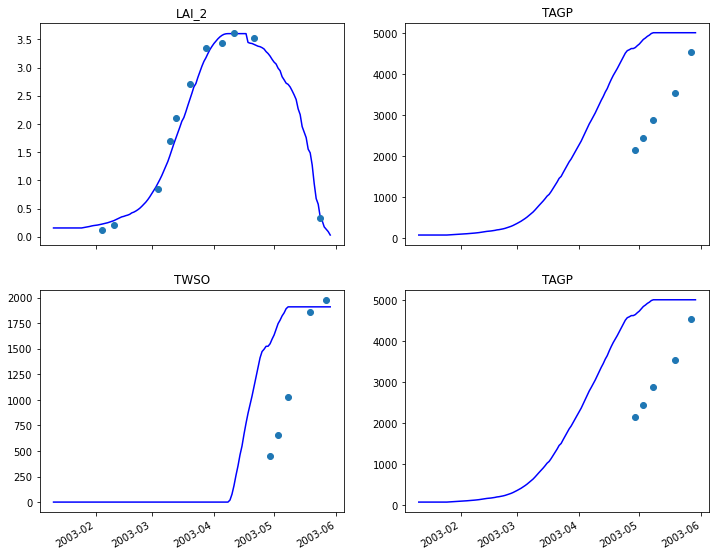

In [267]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharex=True)
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["LAI_2", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

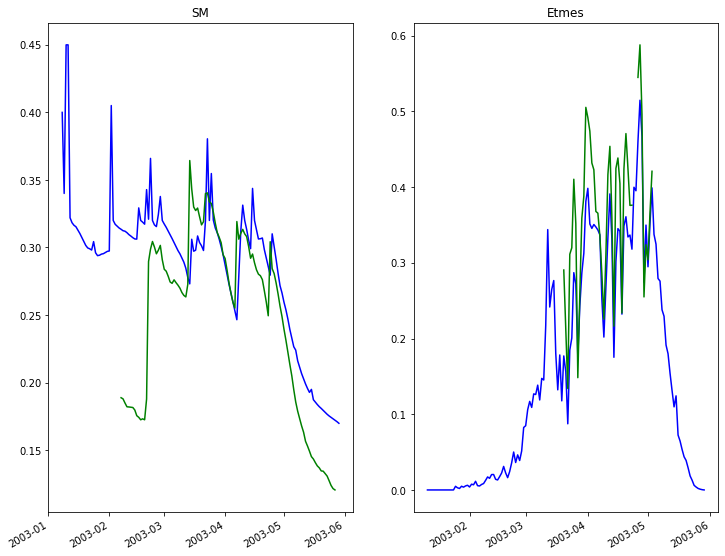

In [268]:
sortie_SM = pd.read_excel('/Users/mac/Soil Moisture Field C1_C2_C3.xlsx', sheet_name="F3-2002-2003_C2")

result_SM = sortie_SM.set_index("day")
                          
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "TRA"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "Etmes"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'g-')
    ax.set_title(var)
fig.autofmt_xdate()


In [ ]:
# import sklearn.linear_model
# from sklearn.linear_model import LinearRegression
# linreg=LinearRegression()
# linreg.score(ix,iy)

ix = (df.LAI)
ix
iy= df.TAGP

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# for var, ax in zip(["TWSO", "TAGP", "LAI", "SM"], axes.flatten()):
#     ax.plot_date(df_results.index, df_results[var], 'b-')
#     ax.set_title(var)
# fig.autofmt_xdate()